In [1]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from dataloader import DataLoader

from tensorflow.keras import layers, losses
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

2023-12-01 18:30:08.123148: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
x_train, y_train, x_test, y_test, longest_graph = DataLoader('../data/test.csv',modelType='gnn', pad = True).getData()

/Users/aidan/Documents/caterpillar/model


[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not removing hydrogen atom without neighbors
[18:35:25] WARNING: not r

/Users/aidan/Documents/caterpillar/model


[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not removing hydrogen atom without neighbors
[18:35:26] WARNING: not r

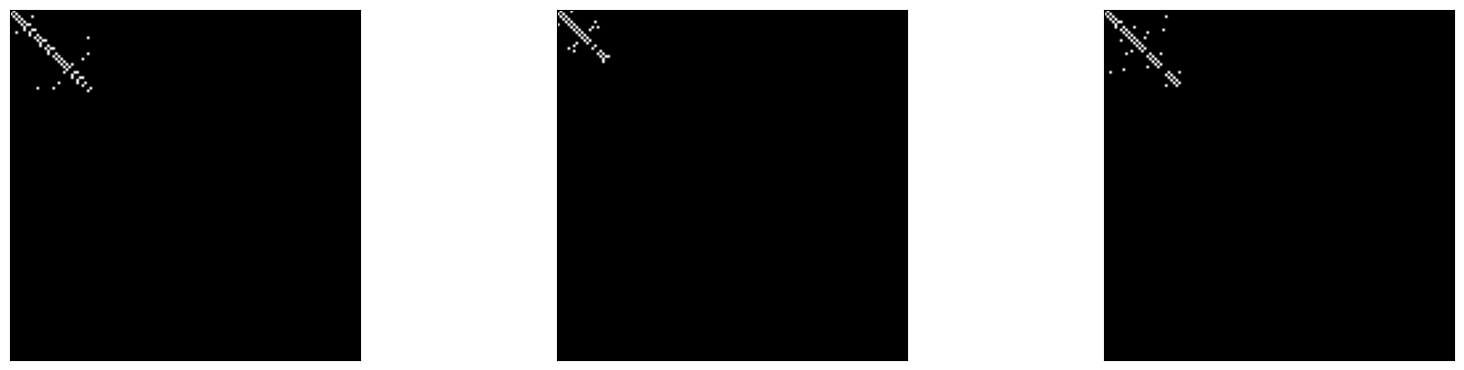

In [9]:
n = 3
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [19]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(132*132, activation='relu'),
            layers.Dense(132, activation='relu'),
            layers.Dense(latent_dim, activation='relu'),
            ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Dense(132*132, activation='sigmoid'),
            layers.Reshape((132, 132))
            ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [16]:
x_train = np.asarray(x_train)
x_train = x_train.astype('float32')

In [20]:
autoencoder = Autoencoder(latent_dim = 10)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history = autoencoder.fit(x_train, x_train, ## TODO: FIX THIS, SOMETHING ABOUT X_TRAIN FORMAT WRONG
                epochs=20,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
 4/51 [=>............................] - ETA: 3:11 - loss: 0.1659

KeyboardInterrupt: 